<a href="https://colab.research.google.com/github/MwangiMwaniki/Financial-inclusion/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_08_ROY_MWANGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the Question

#a) Specifying the Data Analytic Question

Predict which individuals are most likely to have or use a bank account
#b) Defining the Metric for Success

Get to predict which individuals are most likely to have or use a bank account
Get the indicators of Financial inclusion in the 3 countries.
#c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

Doing the research will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#d) Recording the Experimental Design

1. Reading the Data
2. Checking the Data
3.External Data Source Validation
4.Tidying the Dataset
5.Cental measures of Dispersions
6.Exploratory Analysis
7.Implementing the Solution
8. Challenging the solution
9. Follow-up questions

##DATA ANALYSIS

## Reading the Data

In [57]:
#First we will import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Loading the Data from the source
# ---
data = pd.read_csv("http://bit.ly/FinancialDataset")
#Previewing the upper part of the data
data.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


##Checking Data

In [59]:
# Determining the no. of records in our dataset
#
data.shape

(23524, 13)

In [60]:
data.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [61]:
data.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [62]:
#Getting column names
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [63]:
# Checking whether each column has an appropriate datatype
data.dtypes
#Here we can conclude that most of our data is of type object
#But the column year is int64 and household size and age are both float64

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [64]:
# Checking dataset details
#
data.describe()

#the mean household size is 3.68 and the mean age of the population is 38.8 years

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


##External Data Source Validation
* Making sure your data matches something outside of the dataset is very 
important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 
* The research from https://www.statista.com/ shows that the means, mode and medians for ages have almost the same mean, median and mode

##Tyding Dataset

In [65]:
#Finding how many outliers are there in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print("*"*100)
#(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
print(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))

#The IQR range for year is 2 years with a total of 3 years being outliers.
#The IQR range for household size is 3 with a total of 377 respondents being outliers.
#The IQR range for respondemts age is 241 years with a total of 3 years being outliers.

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
****************************************************************************************************
household_size            377
Respondent Age            241
year                        3
uniqueid                    0
marital_status              0
gender_of_respondent        0
country                     0
Type of Location            0
Type of Job                 0
The relathip with head      0
Level of Educuation         0
Has a Bank account          0
Cell Phone Access           0
dtype: int64


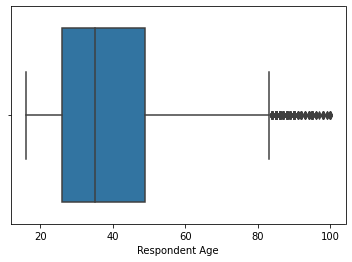

In [66]:
# Checking for Outliers within columns
#Checking for outliers in the column age
sns.boxplot(x=data['Respondent Age'])
#From output, there are a number of outliers for ages between 80 to 100

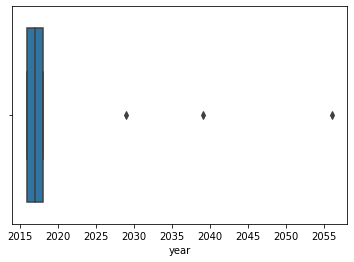

In [67]:
# Checking for Outliers within columns
#Checking for Outliers in the column year
sns.boxplot(x=data['year'])
#There are 3 points shown outside the boxplot which are our outliers

In [68]:
#Removing outliers in the year column
outliers = data[data['year'] > 2018].index
data.drop(outliers , inplace=True)
data.shape

(23521, 13)

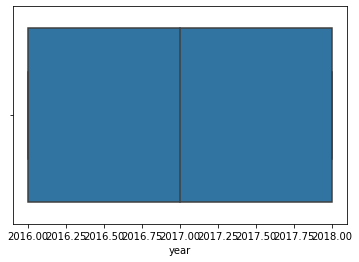

In [69]:
#after removing outliers in year column
sns.boxplot(x=data['year'])

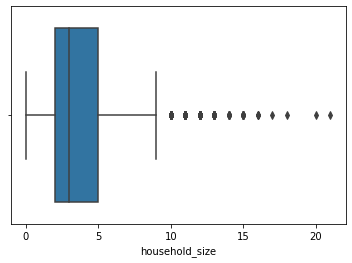

In [70]:
#Checking for outliers in the household size column
sns.boxplot(x=data['household_size'])
#From output, we can conclude that their are a few families with a household 
#size of between 10 and 21

In [71]:
# Checking for Anomalies
data['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [72]:
# Checking for Anomalies
data['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [73]:
# Checking for Anomalies
data['year'].unique()

array([2018, 2016, 2017])

In [74]:
#Removing the outliers/anomalies using percentile
max_threshold = data['household_size'].quantile(0.95)
print(max_threshold)
data2 = data[data['household_size']<= max_threshold]
print(data2.shape)
print(data2.describe())
print(data2['household_size'].unique())

8.0
(22760, 13)
               year  household_size  Respondent Age
count  22760.000000    22760.000000    22735.000000
mean    2016.964938        3.475264       38.902661
std        0.842019        1.979997       16.563180
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        8.000000      100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [75]:
#New dataframe 
data2.reset_index().head(3)

,index,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [76]:
#Changing column names
data2.rename(columns={'Has a Bank account':'bank_acc',
                          'Type of Location':'residence', 'Respondent Age' : 'age', 'gender_of_respondent':'gender',
                          'Level of Educuation':'education', 'Type of Job': 'job'},  inplace=True)
data2.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['country', 'year', 'uniqueid', 'bank_acc', 'residence',
       'Cell Phone Access', 'household_size', 'age', 'gender',
       'The relathip with head', 'marital_status', 'education', 'job'],
      dtype='object')

In [77]:
#Dropping unnecessary columns
data2 = data2.drop(['uniqueid', 'Cell Phone Access', 'The relathip with head', 'marital_status'], axis = 1)
print(data2.columns)

Index(['country', 'year', 'bank_acc', 'residence', 'household_size', 'age',
       'gender', 'education', 'job'],
      dtype='object')


In [78]:
# Identifying the Missing Data
#
data2.isnull().sum()

country           14
year               0
bank_acc          36
residence         15
household_size     0
age               25
gender            29
education         28
job               29
dtype: int64

In [79]:
# Dealing with the Missing Data
#Removing all rows where having a bank account is null
data3 = data2[data2['bank_acc'].notna()] 
data3.shape
data3 = data3.reset_index(drop = True) 
#Drop all columns where value is NaN
data3 = data3[data3['gender'].notna()] 
print(data3.shape)
#data3.isnull().sum()
data_df = data3.dropna(axis=0, inplace=False)
data_df.isnull().sum()

(22695, 9)


country           0
year              0
bank_acc          0
residence         0
household_size    0
age               0
gender            0
education         0
job               0
dtype: int64

In [80]:
#Check for duplicates 
data_df = data_df.drop_duplicates(inplace=False)
data_df.shape

(14834, 9)

##Exploratory Analysis

Univariate Analysis: We will be dealing with numerical variables and we will be checking the following properties:

Mean, Median, Standard Deviation, Kurtosis and skewness distribution/range.

In [81]:
#central tendency of age
print(data_df['age'].mean())
print(data_df['age'].mode())
print(data_df['age'].median())

40.24565188081434
0    30.0
dtype: float64
36.0


In [82]:
#measures of dispersion of age
print(data_df['age'].std())
print(data_df['age'].var())

print(data_df['age'].skew())
print(data_df['age'].kurt())
#The graph for age of respodents is left skewed and flat peaked.

17.44350676626926
304.27592830488146
0.7500085046671529
-0.15922222129866714


In [83]:
mean_householdsize = data_df['household_size'].mean()

data_df['household_size']=data_df.household_size.mask(data_df.household_size == 0,mean_householdsize)

In [84]:
#central tendency of house hold
print(data_df['household_size'].mean())
print(data_df['household_size'].mode())
print(data_df['household_size'].median())

3.6161296515376966
0    2.0
dtype: float64
3.0


In [85]:
#measures of dispersion of household_size
print(data_df['household_size'].std())
print(data_df['household_size'].var())

print(data_df['household_size'].kurt())
print(data_df['household_size'].skew())

2.039625370324233
4.160071651270265
-0.8339112415261969
0.4442416815286623


In [86]:
#Get min, max and range
#for age
min_age = data_df['age'].min()
print('minimum age',min_age)
max_age = data_df['age'].max()
print('maximum age',max_age)
range_age = max_age - min_age
print('Age Range',range_age)
#For household size
min_size = data_df['household_size'].min()
print('minimum household',min_size)
max_size = data_df['household_size'].max()
print('maximum household',max_size)
range_size = max_size - min_size
print('Household Range',range_size)

minimum age 16.0
maximum age 100.0
Age Range 84.0
minimum household 1.0
maximum household 8.0
Household Range 7.0


In [87]:
#Calculate quantiles
quantile_age = data_df["age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = data_df["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    36.0
0.75    52.0
Name: age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [88]:
data_df.country.value_counts()

Rwanda      5069
Kenya       4819
Tanzania    3375
Uganda      1571
Name: country, dtype: int64

Text(0.5, 1.0, 'Number of people who participated in survey each year')

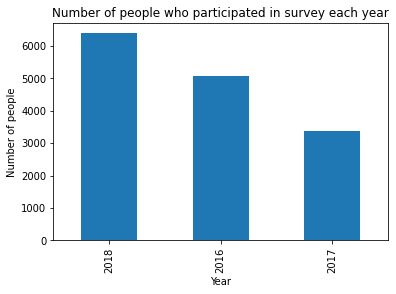

In [89]:
#Plotting histograms
data_df['year'].value_counts().head().plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Number of people who participated in survey each year")

Text(0.5, 1.0, 'Percentage of people who participated in survey each year')

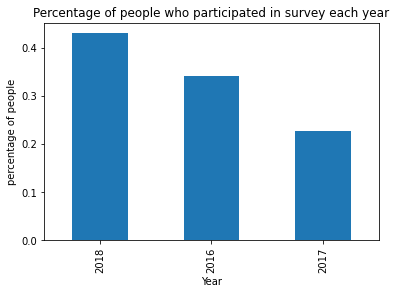

In [93]:
#Percentage of people who participated in survey each year
(data_df['year'].value_counts().head(10) / len(data_df)).plot.bar()
plt.xlabel("Year")
plt.ylabel("percentage of people")
plt.title("Percentage of people who participated in survey each year")

Text(0.5, 1.0, 'Number of people who participated in survey each country')

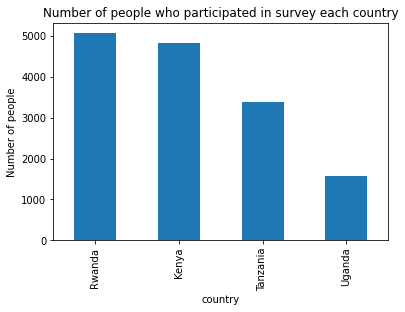

In [92]:
#Number of people who participated in survey each country
data_df['country'].value_counts().head().plot.bar()
plt.xlabel("country")
plt.ylabel("Number of people")
plt.title("Number of people who participated in survey each country")

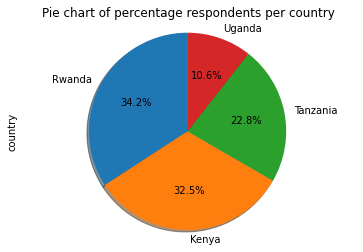

In [94]:
#pie chart for countries
data_df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study
#at 34.2% and Uganda the lowest at 10.6%

In [95]:
data_df.gender.value_counts()

Female    8434
Male      6400
Name: gender, dtype: int64

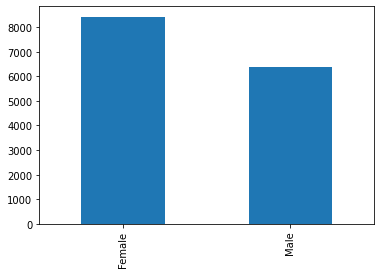

In [97]:
#The distribution of the gender of the respodents
data_df["gender"].value_counts().head().plot.bar()

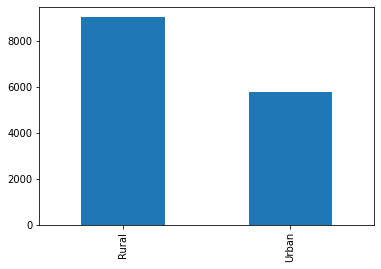

In [96]:
#Type of location participants came from.
data_df["residence"].value_counts().head().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


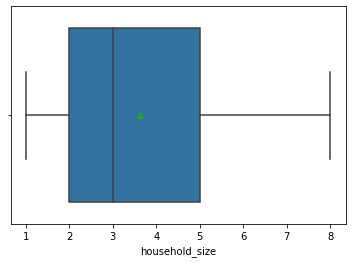

In [98]:
sns.boxplot(data_df["household_size"], showmeans=True)

No     11851
Yes     2983
Name: bank_acc, dtype: int64


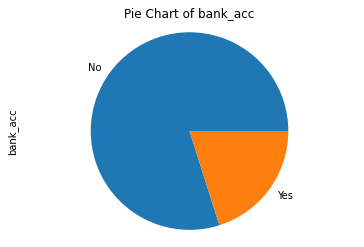

In [100]:
#How many people have a bank account?
print(data_df['bank_acc'].value_counts())
data_df["bank_acc"].value_counts()
data_df["bank_acc"].value_counts().head().plot.pie()

plt.axis('equal')
plt.title('Pie Chart of bank_acc')
plt.show()

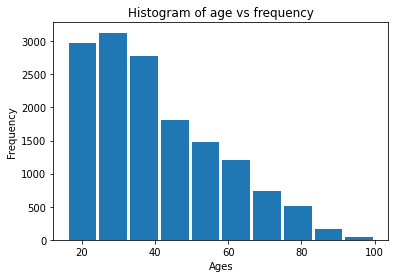

In [101]:
#Plotting a age histogram
age_points = data_df['age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
#We can conclude that the greater population in the dataset is between the ages
# of 25 and 30.

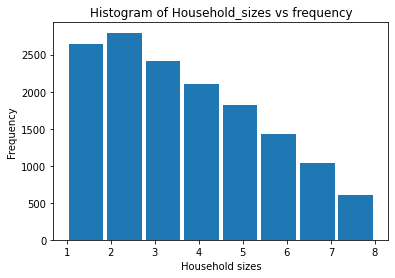

In [102]:
#Plotting a age histogram
size_points = data_df['household_size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of Household_sizes vs frequency')
plt.show()
#We can conclude that the greater population in the dataset has a household size
#of between 2 to 3

In [103]:
data_df['job'].value_counts()

Self employed                   3569
Informally employed             3342
Farming and Fishing             3050
Remittance Dependent            1823
Formally employed Private        942
Other Income                     933
No Income                        467
Formally employed Government     363
Government Dependent             227
Dont Know/Refuse to answer       118
Name: job, dtype: int64

In [105]:
data_df['education'].value_counts()

Primary education                  6764
Secondary education                3314
No formal education                2997
Tertiary education                  990
Vocational/Specialised training     737
6                                    25
Other/Dont know/RTA                   7
Name: education, dtype: int64

##Summary
1.  Rwanda has the highest number of respondents in this study at 34.2% and Uganda the lowest at 10.6%
2. Greater population in the datasets analysis are between the ages of 25 and 30.
3. Most of the people with a bank account are from Rwanda.
4. Most partciapants did not have a cell bank account
5. Most participants were female recording 8434 while males were 6400.
6. Majority of participants are from rural than urban
7. Percentage of people who participated in survey 2018 recorded the highest participants.
8. Most respondents have a household size of between 1 and 2

#b. Bivariate Analysis

In [106]:
#Bivariate analysis, check relationships and differences between two variables.
#We will start with Numeric-Numeric variables, then Categorical-Categorical and lastly Categorical-Numeric variables

#Checking for numeric variables in our data
#isolating numerical datatypes
numerical = data_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

year                int64
household_size    float64
age               float64
dtype: object

In [107]:
#Calculating correlation
correlation = numerical.dropna().corr()
correlation

,year,household_size,age
year,1.000000,-0.088375,-0.034482
household_size,-0.088375,1.000000,-0.127624
age,-0.034482,-0.127624,1.000000


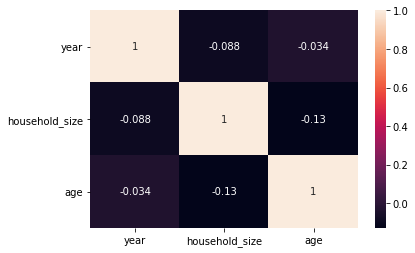

In [108]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is basically no correlation between household size and age of respondents

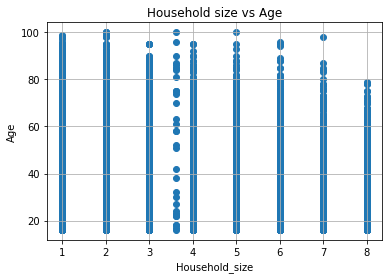

In [109]:
#Plotting scatter plots
plt.scatter(numerical["household_size"] , data_df["age"])

# Giving our scatterplot a title
plt.title('Household size vs Age')

# Labelling our x axis
plt.xlabel('Household_size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.grid()
plt.show()

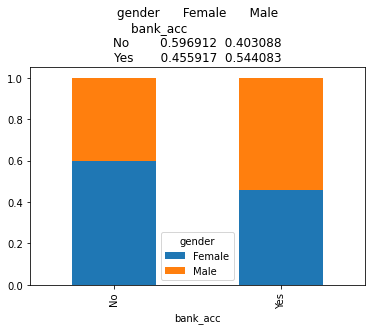

In [112]:
#Which gender is most likely to own a bank account
ax1 = data_df.groupby('bank_acc')['gender'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#the difference between the males and females who own a bank account is 
#significant. The number of Males who own a bank account is significantly more 
#than females.

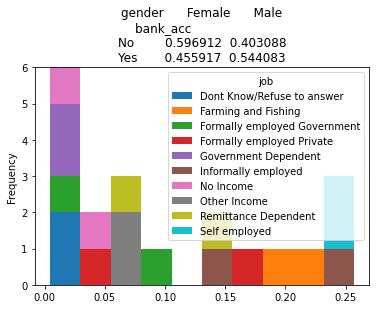

In [113]:
#People from which kind of jobs are most likely to own a bank account
ax2 = data_df.groupby('bank_acc')['job'].value_counts(normalize=True).unstack()
ax2.plot(kind='hist', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals who are self employed are most likely to have a bank account and
# those who are informally employed are less likely to have a bank account

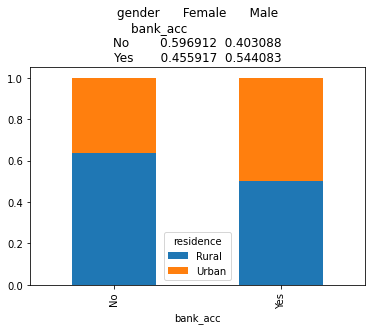

In [114]:
#People from which kind of residence are most likely to own a bank account
ax3 = data_df.groupby('bank_acc')['residence'].value_counts(normalize=True).unstack()
ax3.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals from urban setup are most likely to have a bank account and
# those from rural areas are less likely to have a bank account

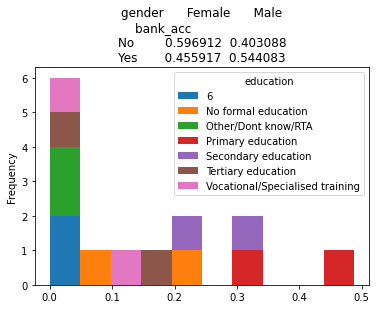

In [116]:
#Check whether people who are educated are most likely to own a bank account
ax4 = data_df.groupby('bank_acc')['education'].value_counts(normalize=True).unstack()
ax4.plot(kind='hist', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals with a secondary education are most likely to have a bank account and
# those with a primary level education are less likely to have a bank account

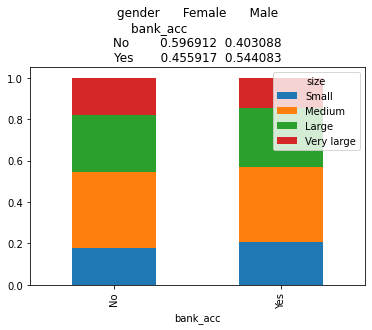

In [117]:
#Household size groups

bins= [1,2,4,6,8]
labels = ['Small','Medium','Large','Very large']
data_df['size'] = pd.cut(data_df['household_size'], bins=bins, labels=labels, right=False)
data_df
#People from which AgeGroup are most likely to own a bank account
ax7 = data_df.groupby('bank_acc')['size'].value_counts(normalize=True).unstack()
ax7.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude  that
#Individuals from medium sized homes are most likely to have a bank 
# account and those from very large families are less likely to have a bank account

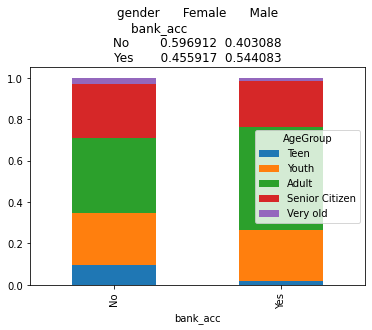

In [120]:
#Numerical-Categorical Variables
#Age groups

bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
data_df['AgeGroup'] = pd.cut(data_df['age'], bins=bins, labels=labels, right=False)
data_df
#People from which AgeGroup are most likely to own a bank account
ax6 = data_df.groupby('bank_acc')['AgeGroup'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()


#From output, we can conclude  that
#Individuals between the ages of 30_50, adults are most likely to have a bank 
# account and those above 80years are less likely to have a bank account

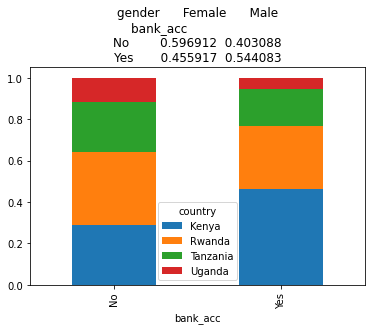

In [121]:
#People from which country are most likely to own a bank account
ax5 = data_df.groupby('bank_acc')['country'].value_counts(normalize=True).unstack()
ax5.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()

#From output, we can conclude 
#Individuals from Kenya are most likely to have a bank account and
# those Uganda are less likely to have a bank account

##Summary of Bivariate Analysis
1. Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account.
2. The difference between the males and females who own a bank account is significant. The number of Males who own a bank account is significantly more than females.
3. Individuals from medium sized homes are most likely to have a bank account and those from very large families are less likely to have a bank account.
4. Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account.
5. Individuals who are self employed are most likely to have a bank account and those who are informally employed are less likely to have a bank account.
6. Individuals from Kenya are most likely to have a bank account and those Uganda are less likely to have a bank account.

#C. Multivariate Analysis

In [ ]:
##we will perform the Linear Discriminant Analysis Reduction Technique
# and then complete by conducting the multiple regression analysis

#Checking for relationships between dependent and independent variable.

In [123]:
import scipy.stats as stats

In [122]:
data_df.head(2)

,country,year,bank_acc,residence,household_size,age,gender,education,job,size,AgeGroup
0,Kenya,2018,Yes,Rural,3.0,24.0,Female,Secondary education,Self employed,Medium,Youth
1,Kenya,2018,No,Rural,5.0,70.0,Female,No formal education,Government Dependent,Large,Senior Citizen


In [124]:
#Checking for relationship between dependent variable and independent variable
df= data_df.copy()
df.head(3)
to_nums = {"bank_acc": {"Yes": 1, "No": 0},
           "residence": {"Rural": 0, "Urban": 1},
           "gender": {"Female": 2, "Male": 3}}

#To convert the columns to numbers using replace :
df.replace(to_nums, inplace=True)
print(df.head())
print(df.info())
#calculate point-biserial correlation
x = df['bank_acc']
y = df['age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account

x = df['bank_acc']
y = df['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = df['bank_acc']
y = df['residence']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = df['bank_acc']
y = df['gender']
stats.pointbiserialr(x, y)
#There is a weak correlation between gender and having a bank account

  country  year  bank_acc  ...                        job    size        AgeGroup
0   Kenya  2018         1  ...              Self employed  Medium           Youth
1   Kenya  2018         0  ...       Government Dependent   Large  Senior Citizen
2   Kenya  2018         1  ...              Self employed   Large           Youth
3   Kenya  2018         0  ...  Formally employed Private   Large           Adult
4   Kenya  2018         0  ...        Informally employed     NaN           Youth

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14834 entries, 0 to 22723
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country         14834 non-null  object  
 1   year            14834 non-null  int64   
 2   bank_acc        14834 non-null  int64   
 3   residence       14834 non-null  int64   
 4   household_size  14834 non-null  float64 
 5   age             14834 non-null  float64 
 6   gen

PointbiserialrResult(correlation=0.11410387880558051, pvalue=3.536519594800913e-44)

In [ ]:
#Reduction Techniques

#dividing data into labels and feature set
x = data_df.iloc[:, 4:6].values
y = data_df.iloc[:, 2].values


In [128]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [129]:
#performing feature scaling:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [130]:
#performing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[ 0.45081481]
 [-1.74830906]
 [-0.63773291]
 ...
 [-2.01265019]
 [ 1.00152549]
 [-0.02522816]]
[[-0.76206402]
 [-1.13580431]
 [-1.35608858]
 ...
 [-1.57208164]
 [ 1.06761078]
 [-0.74358383]]


In [131]:
#Training and Making Predictions
#using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [132]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 80%, 

[[2356    0]
 [ 611    0]]
Accuracy0.7940680822379508


##Summary of Multivariate
1. Most of the variables are not linearly related to the dependent variable.
2. The model achieved an accuracy of 80%
3. Technique used was Linear Discriminant Analysis

#Challenging the solution
1. If the year an individual responded to this survey,how important is it in future reference?
2. How does having access to a phone play a role in an individual's ability to access a bank accout or have one?


#Follow up Questions
a). Did we have the right data?

Yeah we do have the right data but it is not exhaustive of all variables that might affect having a bank acount or not in real life.
b). Do we need other data to answer our question?

We do need more that complement this data and give it context and a better realistic understanding.

c). Did we have the right question?

Yeah we did.
